In [5]:
import numpy as np
import cv2 as cv
import cv2
import matplotlib.pyplot as plt

In [6]:
vid = cv2.VideoCapture(0)

if(vid.isOpened() == False):
    print('Error opening video stream or file')

img = []
while(vid.isOpened()):
    ret, img = vid.read()
    if ret == True:
        img = img[100:1000, 600:1500]
        cv2.imwrite("screenshot.jpg", img)
        break

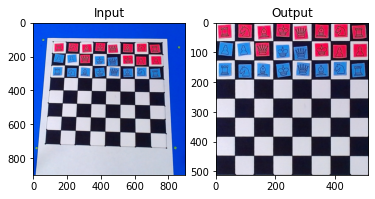

In [7]:
import matplotlib.pyplot as plt
img = cv.imread('screenshot.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
rows,cols,ch = img.shape
pts1 = np.float32([[120,116],[759, 121],[73, 718],[786, 741]])
pts2 = np.float32([[0,0],[512,0],[0,512],[512,512]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(512,512))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

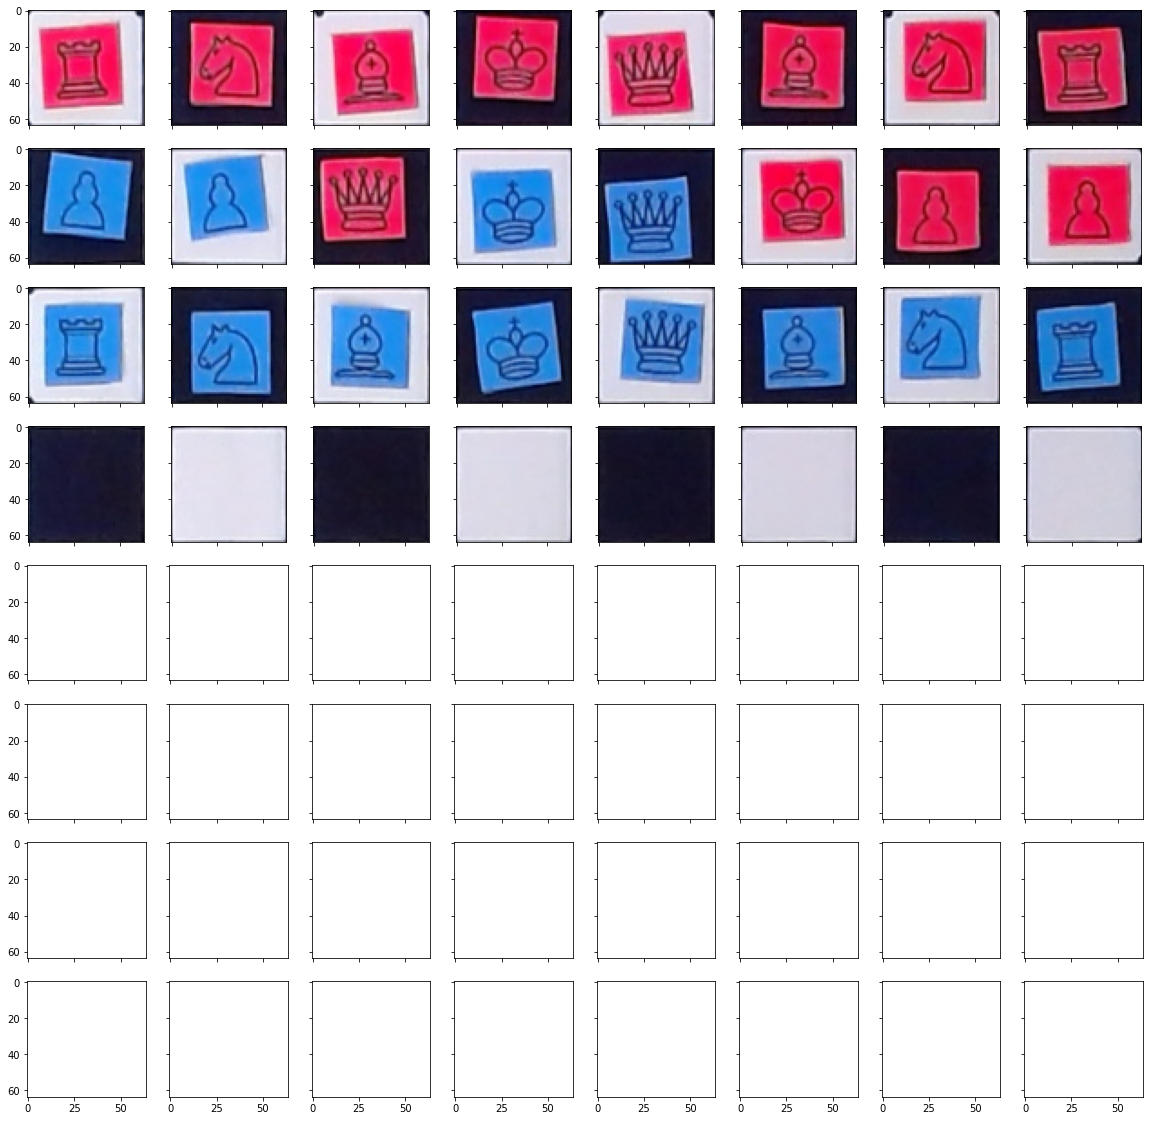

In [8]:
from PIL import Image


fig, axes = plt.subplots(nrows=8, ncols=8, sharex=True, sharey=True, figsize=(20,20))

for i in range(4):
    for j in range(8):
        img2 = dst[64*i:64*i + 64, 64*j:64*j + 64]
        Image.fromarray(img2).save('dataset/{0}__{1}.jpg'.format(i, j))
        img2 = dst[64*i:64*i + 64, 64*j:64*j + 64]
        axes[i][j].imshow(img2)